# Tópico 1 - Problema do Caixeiro Viajante (Traveling Salesman Problem)

Dado um conjunto de cidades e as distâncias entre cada par de cidades, o objetivo é encontrar o caminho mais curto que visita cada cidade exatamente uma vez e retorna à cidade de origem, minimizando a distância total percorrida.

Formalmente, seja \( n \) o número de cidades, ($d_{ij}$) a distância entre as cidades ($i$) e ($j$), e ($P$) o conjunto de todos os possíveis caminhos. O problema pode ser descrito pela seguinte função de minimização:

$ \text{Minimizar} \sum_{(i, j) \in P} d_{ij} \cdot x_{ij} $

sujeito a:

1. Cada cidade é visitada exatamente uma vez:
   $ \sum_{j=1, j \neq i}^{n} x_{ij} = 1 \quad \forall i \in \{1, 2, ..., n\} $

2. Cada cidade é deixada exatamente uma vez:
   $ \sum_{i=1, i \neq j}^{n} x_{ij} = 1 \quad \forall j \in \{1, 2, ..., n\} $

3. Evitar subciclos (garantir que o percurso forme um ciclo hamiltoniano).

Onde ($x_{ij}$) é uma variável binária que indica se o arco entre as cidades \( i \) e \( j \) é incluído no percurso (1 se incluído, 0 caso contrário).

O **Problema do Caixeiro Viajante** é também um problema NP-difícil, e embora existam algoritmos exatos para pequenas instâncias, a complexidade computacional aumenta rapidamente com o número de cidades, tornando-se impraticável para grandes instâncias. Muitos métodos heurísticos e algoritmos aproximados são utilizados para encontrar soluções eficientes em prática.

## Criação do Dataset

In [49]:
!pip install geopy

In [50]:
import geopy.distance
import numpy as np

def give_me_coordinates(start_lat, start_lon, max_delta):    
    lat = start_lat + np.random.rand() * max_delta
    lon = start_lon + np.random.rand() * max_delta
    
    return (lat, lon)
    

def give_me_distance(start, end, var = 1):
    d = geopy.distance.geodesic(start, end).km
    return d * (1+np.random.randn()/10)

def create_tsp(number_of_cities, start_lat, start_lon, max_delta = 2):
    
    city_locations = [give_me_coordinates(start_lat, start_lon, max_delta) for _ in range(number_of_cities)]
    total_distances = []
    for start in city_locations:
        distances = []
        for finish in city_locations:
            distances.append(give_me_distance(start, finish))
        total_distances.append(distances)
    return total_distances
        

In [51]:
distances = create_tsp(10,50,20)

In [52]:
distances

[[0.0,
  109.45808328763181,
  93.29803449472195,
  79.14300535844792,
  124.02441717394993,
  58.7179215176095,
  56.80727625586976,
  90.62917581801834,
  65.11172367366981,
  73.17486782141482],
 [99.94614699500212,
  0.0,
  61.59961385836219,
  223.3293609720214,
  19.791486813503344,
  159.25950247955967,
  94.4267963926442,
  92.00665002959259,
  59.88167963875736,
  160.43967970777445],
 [72.21395693804263,
  65.82156135382486,
  0.0,
  139.61104651556832,
  71.91240943682593,
  121.13315753323066,
  99.74160063051009,
  36.39195951445621,
  29.29613759841066,
  210.3857135860852],
 [75.19687396662277,
  201.63999255562695,
  179.94736692998265,
  0.0,
  237.20430994259306,
  34.1114510378472,
  129.86806268648027,
  143.8817494498446,
  132.73090476455258,
  120.65897552081182],
 [135.5007832857448,
  17.992041467449923,
  70.61027055267614,
  188.89149501137663,
  0.0,
  141.78306061382895,
  82.43855815157055,
  111.59672856467158,
  66.06158604815462,
  163.03331128105884],


## Função Objectivo (Sugestão)

In [53]:
import numpy as np

In [54]:
solucao_candidata = np.random.choice(10, 10, replace=False)

In [55]:
solucao_candidata

array([6, 5, 9, 3, 8, 7, 2, 4, 0, 1])

In [56]:
def objective_function(distances,solucao_candidata):
    last_city = solucao_candidata[0]
    total_distance = 0
    for city in solucao_candidata:
        total_distance += distances[last_city][city]
        last_city = city
    total_distance += distances[last_city][solucao_candidata[0]] # por ultimo regressamos à cidade original
    return total_distance

In [57]:
objective_function(distances, solucao_candidata)

958.0707106367921

## Simulated Annealing

In [58]:
#sugestão vizinhança 1
def generate_neighbor(solution):
    # Implementa uma perturbação simples na solução trocando duas cidades de posição
    neighbor = solution.copy()
    idx1, idx2 = np.random.choice(len(solution), size=2, replace=False)
    neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]
    return neighbor

In [59]:
def simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate, num_iterations):
    current_solution = initial_solution
    best_solution = current_solution
    temperature = initial_temperature

    for iteration in range(num_iterations):
        neighbor_solution = generate_neighbor(current_solution)
        current_cost = objective_function(distances, current_solution)
        neighbor_cost = objective_function(distances, neighbor_solution)

        if neighbor_cost < current_cost or np.random.rand() < np.exp((current_cost - neighbor_cost) / temperature):
            current_solution = neighbor_solution

        if neighbor_cost < objective_function(distances, best_solution):
            best_solution = neighbor_solution

        temperature *= cooling_rate

    return best_solution



In [60]:
# Exemplo de uso
num_cities = 10
start_lat, start_lon = 50, 20
max_delta = 2

city_locations = [give_me_coordinates(start_lat, start_lon, max_delta) for _ in range(num_cities)]
distances = [[give_me_distance(city_locations[i], city_locations[j]) for j in range(num_cities)] for i in range(num_cities)]

initial_solution = np.random.permutation(num_cities)
initial_temperature = 1000.0
cooling_rate = 0.95
num_iterations = 20000

best_solution = simulated_annealing(distances, initial_solution, initial_temperature, cooling_rate, num_iterations)
best_distance = objective_function(distances, best_solution)

print("Melhor solução:", best_solution)
print("Distância da melhor solução:", best_distance)

Melhor solução: [8 1 3 4 5 7 0 2 9 6]
Distância da melhor solução: 408.53895894481866


In [61]:
#sugestão de vizinhança 2
def generate_neighbor_v2(solution):
    # Escolhe aleatoriamente uma cidade para ser movida para a última posição
    idx = np.random.choice(len(solution), size=1, replace=False)[0]
    
    # Gera a nova solução com a cidade escolhida na última posição
    neighbor = np.concatenate([solution[:idx], solution[idx+1:], [solution[idx]]])
    
    return neighbor

In [62]:
def simulated_annealing_v2(distances, initial_solution, initial_temperature, cooling_rate, num_iterations):
    current_solution = initial_solution
    best_solution = current_solution
    temperature = initial_temperature

    for iteration in range(num_iterations):
        neighbor_solution = generate_neighbor_v2(current_solution)
        current_cost = objective_function(distances, current_solution)
        neighbor_cost = objective_function(distances, neighbor_solution)

        if neighbor_cost < current_cost or np.random.rand() < np.exp((current_cost - neighbor_cost) / temperature):
            current_solution = neighbor_solution

        if neighbor_cost < objective_function(distances, best_solution):
            best_solution = neighbor_solution

        temperature *= cooling_rate

    return best_solution

In [63]:
# Exemplo de uso
num_cities = 10
start_lat, start_lon = 50, 20
max_delta = 2

city_locations = [give_me_coordinates(start_lat, start_lon, max_delta) for _ in range(num_cities)]
distances = [[give_me_distance(city_locations[i], city_locations[j]) for j in range(num_cities)] for i in range(num_cities)]

initial_solution = np.random.permutation(num_cities)
initial_temperature = 1000.0
cooling_rate = 0.95
num_iterations = 20000

best_solution = simulated_annealing_v2(distances, initial_solution, initial_temperature, cooling_rate, num_iterations)
best_distance = objective_function(distances, best_solution)

print("Melhor solução:", best_solution)
print("Distância da melhor solução:", best_distance)

Melhor solução: [4 7 0 9 1 3 2 8 5 6]
Distância da melhor solução: 424.89633258426124


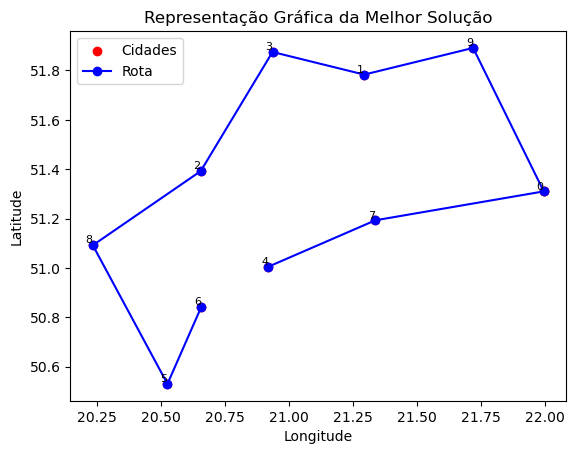

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Função para plotar as cidades e a rota
def plot_solution(city_locations, solution):
    # Descompacta as coordenadas das cidades
    lats, lons = zip(*city_locations)
    
    # Adiciona a primeira cidade no final para fechar o ciclo
    lats += (lats[0],)
    lons += (lons[0],)
    
    # Plota as cidades
    plt.scatter(lons, lats, color='red', marker='o', label='Cidades')
    
    # Plota a rota
    plt.plot(np.take(lons, solution), np.take(lats, solution), linestyle='-', marker='o', color='blue', label='Rota')
    
    # Adiciona rótulos para as cidades
    for i, txt in enumerate(range(len(city_locations))):
        plt.annotate(txt, (lons[i], lats[i]), fontsize=8, ha='right', va='bottom')
    
    # Adiciona legendas e títulos
    plt.legend()
    plt.title('Representação Gráfica da Melhor Solução')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Exibe o gráfico
    plt.show()

# Exemplo de uso
plot_solution(city_locations, best_solution)

In [48]:
def run_sa_experiments(distances, initial_solution, initial_temperatures, cooling_rates, num_iterations):
    results = []

    for initial_temp in initial_temperatures:
        for cooling_rate in cooling_rates:
            # Executa o Simulated Annealing para uma combinação específica de temperatura inicial e taxa de resfriamento
            best_solution = simulated_annealing(distances, initial_solution, initial_temp, cooling_rate, num_iterations)
            best_distance = objective_function(distances, best_solution)

            # Armazena os resultados
            results.append({
                'initial_temp': initial_temp,
                'cooling_rate': cooling_rate,
                'best_solution': best_solution,
                'best_distance': best_distance
            })

    return results

# Configurações para experimentos
initial_temperatures = [1000, 5000, 10000]
cooling_rates = [0.95, 0.98, 0.99]
num_iterations = 10000

# Executa experimentos
experiment_results = run_sa_experiments(distances, initial_solution, initial_temperatures, cooling_rates, num_iterations)

# Imprime os resultados
for result in experiment_results:
    print(f"Initial_temperature {result['initial_temp']}, Colling Rate: {result['cooling_rate']}")
    print(f"Melhor Solução: {result['best_solution']}")
    print(f"Distância da Melhor Solução: {result['best_distance']}")
    print("\n")

Initial_temperature 1000, Colling Rate: 0.95
Melhor Solução: [1 7 9 4 6 0 2 8 5 3]
Distância da Melhor Solução: 525.9392003692781


Initial_temperature 1000, Colling Rate: 0.98
Melhor Solução: [2 8 5 3 1 7 9 4 6 0]
Distância da Melhor Solução: 525.9392003692781


Initial_temperature 1000, Colling Rate: 0.99
Melhor Solução: [1 3 9 4 6 0 2 8 5 7]
Distância da Melhor Solução: 570.2556013792396


Initial_temperature 5000, Colling Rate: 0.95
Melhor Solução: [3 5 8 0 2 4 6 9 7 1]
Distância da Melhor Solução: 536.171403941672


Initial_temperature 5000, Colling Rate: 0.98
Melhor Solução: [3 9 4 6 7 1 8 0 2 5]
Distância da Melhor Solução: 626.3512774187419


Initial_temperature 5000, Colling Rate: 0.99
Melhor Solução: [0 2 8 5 3 1 7 9 4 6]
Distância da Melhor Solução: 525.9392003692781


Initial_temperature 10000, Colling Rate: 0.95
Melhor Solução: [7 9 4 6 3 5 8 0 2 1]
Distância da Melhor Solução: 570.752410044926


Initial_temperature 10000, Colling Rate: 0.98
Melhor Solução: [8 5 3 1 7 9 4 

#####4. A escolha da estratégia de vizinhança pode ter um impacto significativo no desempenho do algoritmo Simulated Annealing. Se a atualização não for aleatória e sempre escolher a vizinhança onde a distância é a maior, isso pode afetar a capacidade do algoritmo de escapar de mínimos locais e encontrar soluções melhoreAo sempre escolher a vizinhança onde a distância é a maior, o algoritmo pode ficar preso em ótimos locais subótimos sem explorar outras regiões do espaço de busca. Isso pode resultar em soluções que não são tão boas quanto poderiam ser se o algoritmo tivesse explorado mais amplamente o espaço de solução.A aleatoriedade na escolha da vizinhança permite que o algoritmo explore diferentes regiões do espaço de busca, o que é benéfico para escapar de mínimos locais e encontrar soluções mais próximas do ótimo global.Em resumo, é geralmente recomendado manter alguma aleatoriedade na escolha da vizinhança durante o Simulated Annealing para garantir uma exploração mais ampla do espaço de solução e aumentar as chances de encontrar soluções de melhor qualidade.

# Desafio - Programação 

Dependendo do algoritmo escolhido, responde às seguintes questões (com suporte gráfico, quando necessário).

**Simulated Annealing**:
1. Codifica um algoritmo capaz de fazer uma procura pelo ótimo global.
2. Testa várias combinações de Temperatura Inicial e de método de atualização de Temperatura, e comenta sobre o impacto que esta atualização e valor tem no resultado final do modelo.
3. Cria mais do que um conceito de vizinhança para a velocidade de convergência do modelo? 
    * Sugestão Vizinhança 1: A vizinhança de uma solução atual, é uma solução em que duas cidades trocam de posição (e.g. [1,2,3] passa para [1,3,2])
    * Sugestão de Vizinhança 2: A vizinhança consiste em todas as cidades na mesma posição à excepção de uma que passa a ser a última cidade (e.g. [2,4,5,1,3] passa para [2,5,1,3,4]  
3. O que acontece ao modelo se a atualização não for aleatória, mas passar a ser sempre aquela em que a distância é a maior? Este modelo tem melhores resultados?

**Algoritmo Genético**:
1. Codifica um algoritmo capaz de fazer uma procura pelo ótimo global.
2. Explica a escolha de representação do cromossoma, e a maneira como as duas operações de reprodução foram codificadas:
    * mutação
    * cross-over
3. O que acontece ao modelo se a atualização não for aleatória, mas passar a ser sempre aquela em que a distância é a maior? Este modelo tem melhores resultados?